In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pylab as plt
import glob
import os
import shutil
from pprint import pprint
import zipfile

In [2]:
import stephane.display.graphes as graphes
import stephane.tools.Smath as smath


import icewave.phone.analyse as analyse
import scipy.signal as sig

In [31]:
date = '2024_0226'
year,day = date.split('_')

base = '/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/'
folder = base+'Data/'+year+'/'+day+'/T_00*'
norme_folder = base + 'Nomenclature/'
savefolder = base+'Data/'+year+'/'+day+'/Results'

if not os.path.exists(savefolder):
    os.makedirs(savefolder)

filelist = glob.glob(folder)
print(filelist)
folder = os.path.dirname(filelist[0])
print(folder)

['/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0226/T_0001_04_AGML']
/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0226


In [5]:
data = {}
for filename in filelist:
    with zipfile.ZipFile(filename,"r") as zip_ref:
        foldersave = filename.split('.')[0]
        zip_ref.extractall(foldersave)

IsADirectoryError: [Errno 21] Is a directory: '/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0226/T_0001_04_AGML'

In [6]:
datafiles = glob.glob(filelist[0]+'/*.csv')

In [12]:
import icewave.phone.load as load_phone

data = load_phone.load(filelist[0])
data = load_phone.sort(data)

a
/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0226/T_0001_04_AGML/Accelerometer.csv
g
/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0226/T_0001_04_AGML/Gyroscope.csv
l
/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0226/T_0001_04_AGML/Location.csv
m
/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0226/T_0001_04_AGML/Magnetometer.csv


In [13]:
print(data.keys())

dict_keys(['gy', 'gx', 'gz', 'tg', 'ay', 'ax', 'az', 'ta', 'my', 'mx', 'mz', 'tm', 'loc'])


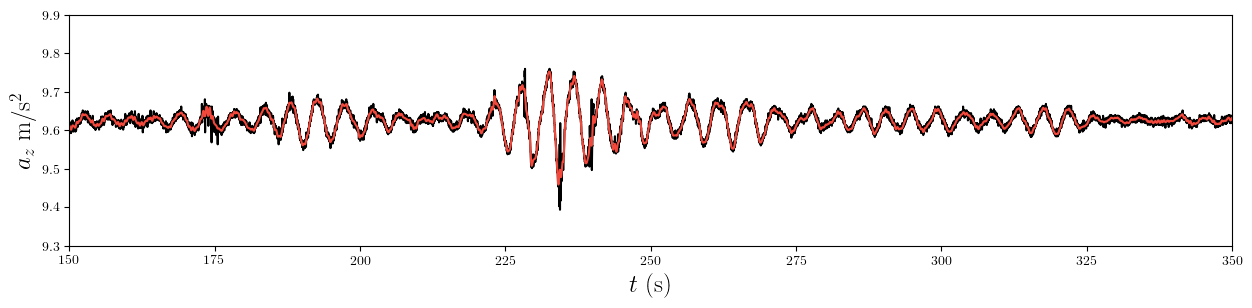

In [46]:
plt.subplots(figsize=(15,3))
#data['a']
plt.plot(data['ta'],data['az'],'k')
plt.xlim([150,350])
plt.ylim([9.3,9.9])
figs = graphes.legende('$t$ (s)','$a_z$ m/s$^2$','')


[b,a] = sig.butter(6,0.1,'low')
az_f =  sig.filtfilt(b,a,data['az'])


'#F4AD3C'
plt.plot(data['ta'],az_f,color=(244/256,73/256,60/256))

graphes.save_figs(figs,savedir=savefolder,overwrite=True)

dict_keys(['a', 'g', 'l', 'm'])
['0.0' '0.0' '0.1940502822' ... '0.0' '0.0' '0.0']


(9.25, 10.5)

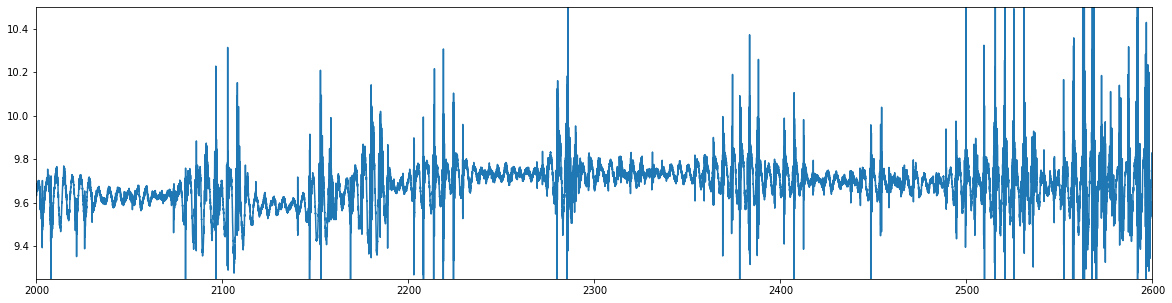

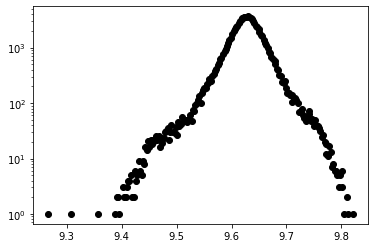

In [79]:
[n,x] = np.histogram(data['a']['d'][:,3][5000:100000],500)

xc = (x[1:]+x[:-1])/2

plt.plot(xc-x0,n,'ko')
plt.yscale('log')


In [12]:
folderlist = glob.glob(folder+'/*/')

data = {}
for fold in folderlist:
    print(fold)
    d,key = phone.read_data(fold)

/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0210/Telephones/Sag24_S101_2024_0210/0000_01_Accelero_Gyro_Magneto_GPS 2024-02-10_19-10-30/
/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0210/Telephones/Sag24_S101_2024_0210/0000_04_192_168_0_104/
/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0210/Telephones/Sag24_S101_2024_0210/0000_06_Accelero_Gyro_Magneto_GPS 2024-02-10_18-55-25/
/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0210/Telephones/Sag24_S101_2024_0210/0000_07_Accelero_Gyro_Magneto_GPS 2022-04-10_11-00-32/
/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0210/Telephones/Sag24_S101_2024_0210/0000_08_Accelero_Gyro_Magneto_GPS 2024-02-10_18-38-02/
/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0210/Telephones/Sag24_S101_2024_0210/0000_09_Accelero_Gyro_Magneto_GPS 2024-02-10_18-40-35/
/Users/stephane/Documents/git/icewave/icew